In [2]:
from tifffile import imwrite, imread
import os
import math
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope
import seaborn as sns
sns.set(style='ticks')

In [3]:
df = pd.read_csv('Data/ShapeIdentify/Predict/Output1008.csv')

In [4]:
labels = []
for i in range(df.shape[0]):
    label = df['Filename'][i]
    label = int(label[:-4])
    labels.append(label)

df['Label'] = labels

In [5]:
df_sort = df.sort_values(by=['Label'], ignore_index=True)
df_sort

,RodProbability,Rod,Filename,Label
0,0.000061,0,1.tif,1
1,0.996506,1,2.tif,2
2,0.000017,0,3.tif,3
3,0.001533,0,4.tif,4
4,0.999984,1,5.tif,5
...,...,...,...,...
3203,0.000041,0,3204.tif,3204
3204,0.016624,0,3205.tif,3205
3205,1.000000,1,3206.tif,3206
3206,0.972758,1,3207.tif,3207


In [6]:
#Input cell morphology information

In [7]:
df = pd.read_csv('shewan_biofilm.csv')
df.head()

,Volume,Solidity,PrincipalAxisLength_1,PrincipalAxisLength_2,PrincipalAxisLength_3,PrincipalAxisLength_32ratio,OrientationVector_x,OrientationVector_y,OrientationVector_z,BoundingBox_x,BoundingBox_y,BoundingBox_z,BoundingBox_wx,BoundingBox_wy,BoundingBox_wz
0,208,0.784906,12.953777,6.026627,4.424581,0.734172,0.267038,-0.962246,0.052659,0.5,8.5,0.5,12,8,5
1,451,0.749169,17.834520,6.768599,6.105318,0.902006,0.975086,-0.218923,-0.035764,24.5,12.5,0.5,10,18,10
2,135,0.950704,6.512637,6.123165,5.300518,0.865650,-0.067817,-0.271184,0.960135,109.5,0.5,1.5,7,6,8
3,760,0.775510,21.725340,8.782485,6.458644,0.735401,-0.059285,0.064144,0.996178,52.5,2.5,1.5,23,8,12
4,179,0.978142,8.092908,5.962277,5.494640,0.921567,-0.733256,-0.388385,0.558115,62.5,6.5,1.5,8,9,7


In [8]:
#PCA
df_pca = df.drop(columns=['PrincipalAxisLength_3','OrientationVector_x', 'OrientationVector_y','OrientationVector_z', 'BoundingBox_x', 'BoundingBox_y', 
                          'BoundingBox_z', 'BoundingBox_wx', 'BoundingBox_wy', 'BoundingBox_wz'])
df_pca = StandardScaler().fit_transform(df_pca)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_pca)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(pca.explained_variance_ratio_)

[0.6909341  0.23250552]


In [14]:
principalDf['Rod'] = df_sort['Rod']
principalDf['label'] = [i+1 for i in range(len(principalDf))]
principalDf.head()

,principal component 1,principal component 2,Rod,label
0,0.759395,1.260712,0,1
1,1.534144,-0.633556,1,2
2,-1.387730,1.173572,0,3
3,3.954500,0.754786,0,4
4,-1.616259,0.510070,1,5


C:\Users\GahlmannLab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


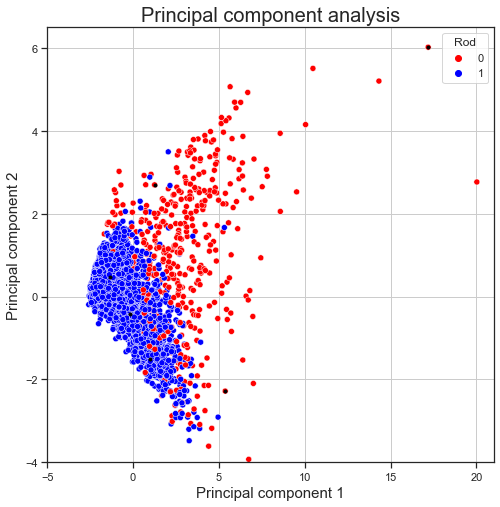

In [29]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal component 1', fontsize = 15)
ax.set_ylabel('Principal component 2', fontsize = 15)
ax.set_title('Principal component analysis', fontsize = 20)
sns.scatterplot(principalDf['principal component 1'],principalDf['principal component 2'], hue=principalDf['Rod'], palette=['red','blue'])
plt.xlim([-5,21])
plt.ylim([-4,6.5])

#Plot select cell
plt.plot(principalDf['principal component 1'][183],principalDf['principal component 2'][183],marker='o', color='black',markersize=3)
plt.plot(principalDf['principal component 1'][115],principalDf['principal component 2'][115],marker='o', color='black',markersize=3)
plt.plot(principalDf['principal component 1'][529],principalDf['principal component 2'][529],marker='o', color='black',markersize=3)
plt.plot(principalDf['principal component 1'][2588],principalDf['principal component 2'][2588],marker='o', color='black',markersize=3)
plt.plot(principalDf['principal component 1'][212],principalDf['principal component 2'][212],marker='o', color='black',markersize=3)
plt.plot(principalDf['principal component 1'][1494],principalDf['principal component 2'][1494],marker='o', color='black',markersize=3)
ax.grid()
plt.savefig('Modelout_PCA.eps', format='eps')

In [16]:
n_rod = np.sum(principalDf['Rod'])
n_total = len(principalDf['Rod'])
rod_percent = n_rod/n_total
print('rod cell percent: ' + str(rod_percent))

rod cell percent: 0.8628428927680798


In [17]:
df['Rod'] = principalDf['Rod']
df['Label'] = principalDf['label']
df.head()

,Volume,Solidity,PrincipalAxisLength_1,PrincipalAxisLength_2,PrincipalAxisLength_3,PrincipalAxisLength_32ratio,OrientationVector_x,OrientationVector_y,OrientationVector_z,BoundingBox_x,BoundingBox_y,BoundingBox_z,BoundingBox_wx,BoundingBox_wy,BoundingBox_wz,Rod,Label
0,208,0.784906,12.953777,6.026627,4.424581,0.734172,0.267038,-0.962246,0.052659,0.5,8.5,0.5,12,8,5,0,1
1,451,0.749169,17.834520,6.768599,6.105318,0.902006,0.975086,-0.218923,-0.035764,24.5,12.5,0.5,10,18,10,1,2
2,135,0.950704,6.512637,6.123165,5.300518,0.865650,-0.067817,-0.271184,0.960135,109.5,0.5,1.5,7,6,8,0,3
3,760,0.775510,21.725340,8.782485,6.458644,0.735401,-0.059285,0.064144,0.996178,52.5,2.5,1.5,23,8,12,0,4
4,179,0.978142,8.092908,5.962277,5.494640,0.921567,-0.733256,-0.388385,0.558115,62.5,6.5,1.5,8,9,7,1,5


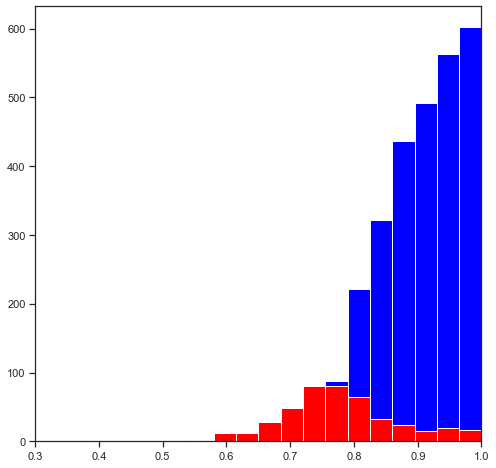

In [18]:
delete_row = []
for i in range(df.shape[0]):
    if df.iloc[i]['Rod'] == 0:
        delete_row.append(i)
df_rod = df.drop(delete_row)

delete_row = []
for i in range(df.shape[0]):
    if df.iloc[i]['Rod'] == 1:
        delete_row.append(i)
df_nonrod = df.drop(delete_row)

n_bins = 20
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
plt.xlim([0.3, 1])
ax.hist(df_rod['Solidity'], bins=n_bins, range=(0.3, 1), color='blue')
ax.hist(df_nonrod['Solidity'], bins=n_bins, range=(0.3, 1), color='red')
plt.savefig('Solidity1015.eps', format='eps')

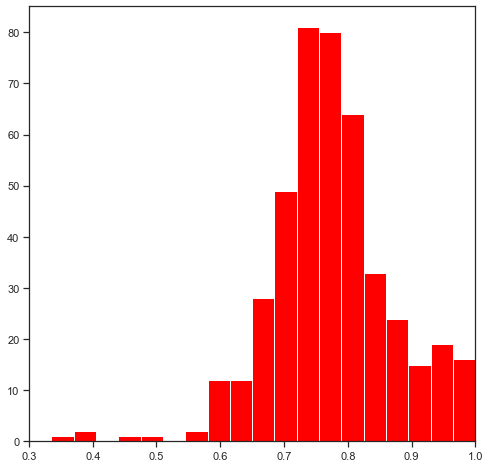

In [20]:
n_bins = 20
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
plt.xlim([0.3, 1])
ax.hist(df_nonrod['Solidity'], bins=n_bins, range=(0.3, 1), color='red')
plt.savefig('Solidity_nonrod1015.eps', format='eps')

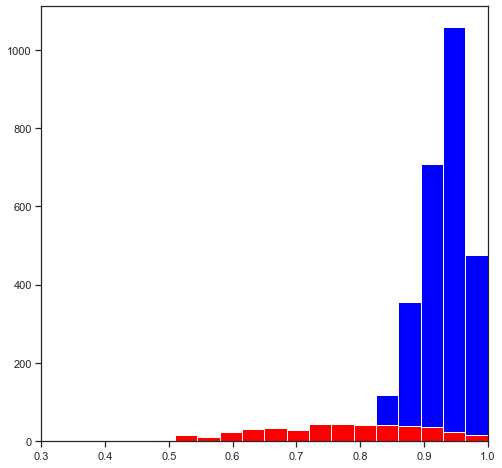

In [22]:
n_bins = 20
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
plt.xlim([0.3, 1])
ax.hist(df_rod['PrincipalAxisLength_3']/df_rod['PrincipalAxisLength_2'], bins=n_bins,range=(0.3,1), color='blue')
ax.hist(df_nonrod['PrincipalAxisLength_3']/df_nonrod['PrincipalAxisLength_2'], bins=n_bins,range=(0.3,1), color='red')
plt.savefig('minoraxis_ratio1015.eps', format='eps')

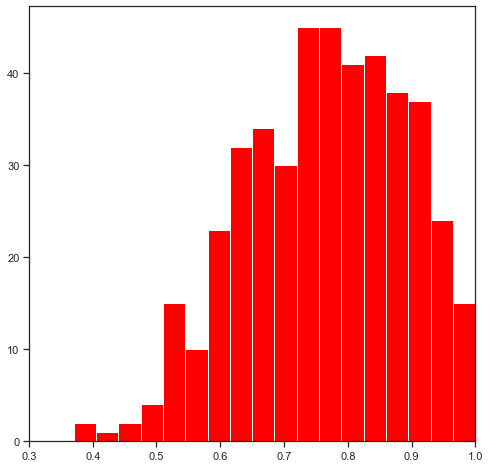

In [23]:
n_bins = 20
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
plt.xlim([0.3, 1])
ax.hist(df_nonrod['PrincipalAxisLength_3']/df_nonrod['PrincipalAxisLength_2'], bins=n_bins,range=(0.3,1), color='red')
plt.savefig('minoraxis_ratio_nonrod1015.eps', format='eps')

In [26]:
from tifffile import imread, imwrite
img = imread('Data/Segmentation/seg_model_Cell_Broder_residual_dist3D0410_Shewanella_488_cytosol&membrane_BgFilter64_11_crop5ms-2.tif')
img_nonrod= img.copy()
img_rod = img.copy()
for i in range(df.shape[0]):
    if df['Rod'][i] == 1:
        img_nonrod[img_nonrod==df['Label'][i]] = 0
    elif df['Rod'][i] == 0:
        img_rod[img_rod==df['Label'][i]] = 0
#Out_filename = '%s_%s' % ('label', str(label)+'.tif')
imwrite('Nonrod1015.tif', img_nonrod.astype('uint16'), metadata={'axes': 'ZYX'})
imwrite('Rod1015.tif', img_rod.astype('uint16'), metadata={'axes': 'ZYX'})